<font size=4 color='blue'>

# <center> Clase 7, julio 7 del 2021 </center>

<font size=4 color='blue'>

# <center> Topic that the Machine will learn: Mortality from diabetes </center>

<font size=4 color='blue'>
    
## Information about the topic

<font size=4>

Evolution of diabetes after one year.
    
In the present work, we characterize diabetes with the following ten features: age, sex, body mass index, mean blood pressure, and six measurements of blood serum (S1, S2, S3, S4, S5, S6).

<font size=4 color='blue'>
    
## Quantification of this information

<font size=4>

Information is available on 442 patients (samples). The response of interest, Y, is a quantitative measure of disease progression one year after the start of the study. Y values vary between 25 and 346​.

Information source: [diabetes data (samples)](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    

Original paper: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Samples are available in the file diabetes.csv

df = pd.read_csv('diabetes.csv', sep ='\t')

In [3]:
# Showing the first 5 samples (features and target Y)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


<font size=4>
Abreviation shave the following meaning:
    
    AGE = Age
    SEX = Sex
    BMI = Body Mass Index (BMI)
     BP = Mean Arterial Pressure (MAP)
     S1 = Total Cholesterol (TC)
     S2 = Low Density lipoproteins (LDL)
     S3 = High Density lipoproteins (HDL)
     S4 = Triglyceride (TG, TCH)
     S5 = Serum Concentration of Lamorigine (LTG)
     S6 = Glucose (GLU)
     Y = Quantitative Measure of Diabetes Mellitus Disease Progression (QMDMDP) one year after the baseline.

In [4]:
# The describe() method generates a table with statistical information 
# for each of the features and the target.

df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Histograms are created for each of the features that characterize patients with diabetes:

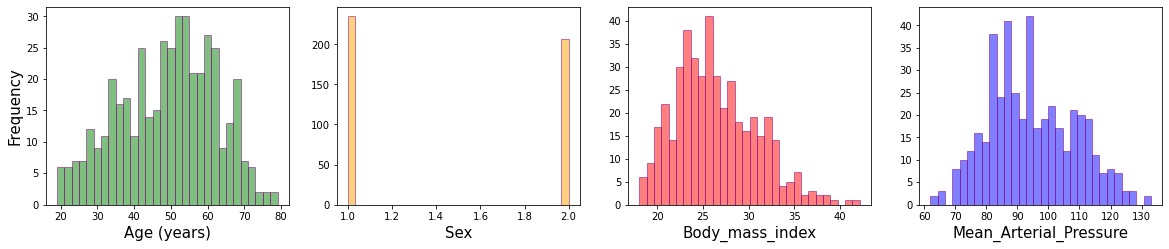

In [5]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Mean_Arterial_Pressure', size=15);

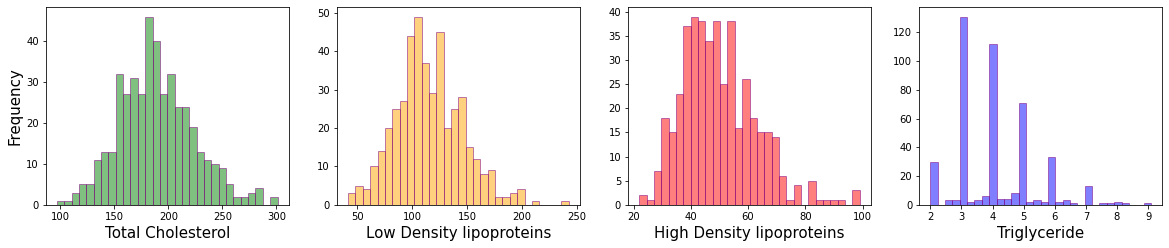

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Total Cholesterol', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Low Density lipoproteins', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('High Density lipoproteins', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Triglyceride', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

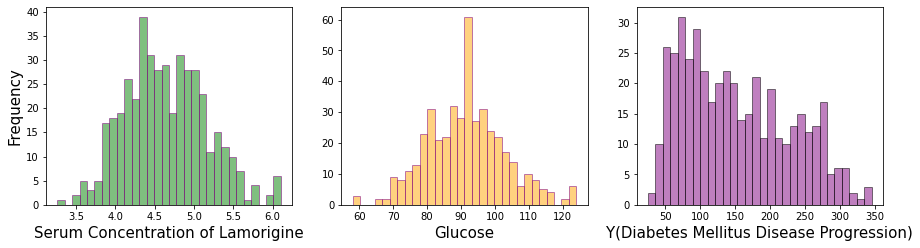

In [7]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Serum Concentration of Lamorigine', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Glucose', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)

<font size=4>

To remove any possible correlation between the samples (the rows of the DataFrame), they are randomly reordered.

In [8]:
np.random.seed(1)

df = df.sample(frac=1)

<font size=4>
    
The original samples are divided into 2 sets: 90% for learning and 10% for making inferences (predictions) after learning.

In [9]:

test_ratio = 0.1

learn_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_learn = df.iloc[0:learn_ratio,:]
df_test  = df.iloc[learn_ratio:,:]

In [10]:
print(df_learn.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=4>

All variables must have the same order of magnitude in order to operate with the models.
As a result, both the features (X) and the target (Y) values are normalized in the samples that will be utilized in learning: 
    
$$x_{i,norm} = \dfrac{x_{i}-\mu}{\sigma}$$
    
$$y_{i,norm} = \dfrac{y_{i}-\mu}{\sigma}$$

In [11]:
mu = df_learn.mean()
sigma = df_learn.std()
df_learn_norm = (df_learn - mu)/ sigma
df_learn_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
246,0.880549,-0.923573,-0.678927,-1.292722,1.678453,1.072260,1.179208,-0.202277,0.963141,-1.241175,-0.960557
425,-1.627292,-0.923573,-0.858406,-1.702184,-2.097449,-2.351121,0.482966,-1.597924,-0.422665,-1.065445,0.009443
293,-1.475302,-0.923573,1.923531,0.271467,0.439035,0.895527,0.018804,0.014824,-1.148812,-0.011066,0.638633
31,-0.487365,-0.923573,-1.374411,-1.702184,-0.800383,-1.113991,1.256568,-1.597924,-0.779650,-0.889715,-1.209611
359,0.804554,1.080025,0.106298,0.680929,0.150798,0.371874,-0.522717,0.728154,0.321844,1.306908,2.093633


<font size=5 color='blue'> 
Important note: The normalization of the test samples is carried out with the values ​​of $ \ mu $ and $ \ sigma $ obtained with the samples used for learning

In [12]:
df_test_norm = (df_test - mu) / sigma
df_test_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
410,-0.183384,1.080025,-0.589187,0.175420,1.015508,0.784251,-0.600078,0.728154,1.408068,-0.889715,0.756606
216,0.272587,1.080025,0.734477,1.042007,1.130803,1.556639,-1.451040,3.054233,0.974545,1.043313,1.267822
264,0.728558,1.080025,0.577432,-0.691166,-0.944502,-0.197598,-1.064239,-0.047205,-1.253375,-0.450391,-0.082314
209,0.804554,1.080025,-0.387272,1.403084,-1.059796,-0.341603,-1.605760,0.728154,-0.244655,-0.274661,-0.973665
316,0.348582,1.080025,0.285778,0.030989,0.035503,-0.439788,-0.677438,0.728154,1.597094,0.867583,0.900795


<font size=4>
    
Histograms of the variables to be used in the learning:

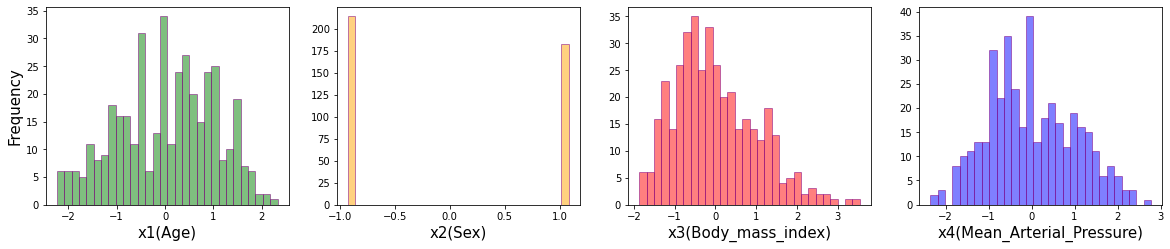

In [13]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_learn_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_learn_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_learn_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_learn_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Mean_Arterial_Pressure)', size=15);

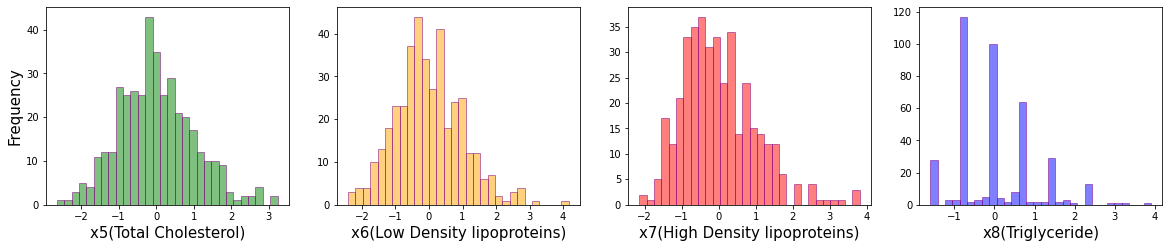

In [14]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_learn_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(Total Cholesterol)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_learn_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(Low Density lipoproteins)', size=15)

ax3.hist(df_learn_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(High Density lipoproteins)', size=15)

ax4.hist(df_learn_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(Triglyceride)', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

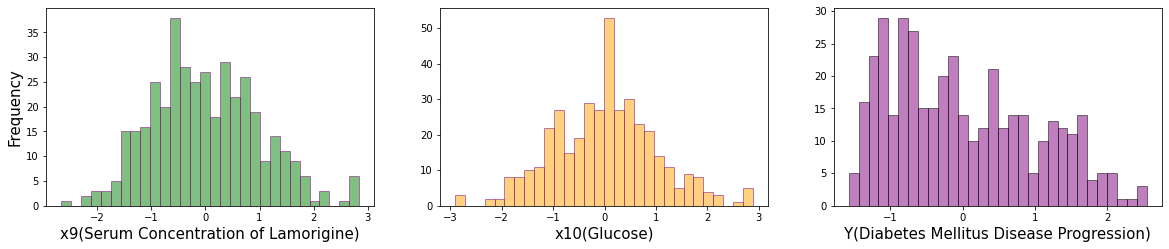

In [15]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_learn_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(Serum Concentration of Lamorigine)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_learn_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(Glucose)', size=15)

ax3.hist(df_learn_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)


<font size=4>
X and Y values are extracted from the columns of the DataFrame.

In [16]:
learn_x = df_learn_norm.values[:,:-1]
learn_y = df_learn_norm.values[:,-1:]

In [17]:
test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [18]:
print(learn_x.shape)
print(learn_y.shape)
print(test_x.shape)
print(test_y.shape)

(397, 10)
(397, 1)
(45, 10)
(45, 1)


<font size=5 color='blue'>

# <center> Modeling different Learning Machines </center>




<font size=4 color='blue'>

# <center> Implemented using the Keras framework as frontend </center>


<font size=4 color='mediumvioletred'>
   
[Keras](https://keras.io/)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from tensorflow.keras import optimizers

np.random.seed(1)

In [20]:
keras.__version__

'2.4.0'

<font size=4 color='black'>

The features that determine the phenomen are described by the vector  $X = (x_1, x_2, x_3, ...x_k,...x_K)$
    
The model assumes that the output Y varies linearly with each feature
    $$ F(X) = \sum_{k=1}^K w_k*x_k + b$$

<font size=5 color='blue'>
    
## <center> The first Learning Machine</center> 

<font size=5 color='blue'>

Model of the Machine: the output $Y$ depends linearly on each of the features.

In [21]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))            
        nx.draw(Q, pos = ps)
                

It has 2 layers,
with the following number of nodes per layer [10, 1]


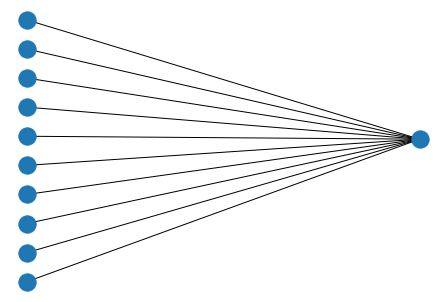

In [22]:
n_x = learn_x.shape[1] 
n_y = learn_y.shape[1]
    
layers = [n_x, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Definition of the architecture. 
    
It includes the initialization of weights and biases, as well as the activation functions.

In [23]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
output_nodes = n_y    # The output layer has n_y nodes

model = Sequential()

# For the first layer, you need to indicate its input layer, which corresponds to
# the input layer of the network.

model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='linear'))


<font size=5 color='blue'>
Architecture Summary and Chart

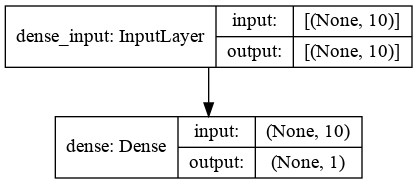

In [24]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

In [26]:
# We define the optimizing function and their hyperparameters: learining rate(lr), 
# decay, momentum and nesterov (whether to apply Nesterov gradient)

sgd = optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
The Machine is learning

In [27]:
# 10 % of the learning samples will be used to validate the learning
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio, verbose=1)

# the "history" object contains the information generated during the learning

Epoch 1/600
12/12 [==============================] - 0s 21ms/step - loss: 0.8742 - val_loss: 0.6716
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6682 - val_loss: 0.5721
Epoch 3/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5626 - val_loss: 0.5379
Epoch 4/600
12/12 [==============================] - 0s 2ms/step - loss: 0.6121 - val_loss: 0.5101
Epoch 5/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5082 - val_loss: 0.4893
Epoch 6/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5047 - val_loss: 0.4769
Epoch 7/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5212 - val_loss: 0.4627
Epoch 8/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4642 - val_loss: 0.4660
Epoch 9/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5111 - val_loss: 0.4622
Epoch 10/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4911 - val_loss: 0.4615
Epoch 11

12/12 [==============================] - 0s 2ms/step - loss: 0.5118 - val_loss: 0.4493
Epoch 84/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5334 - val_loss: 0.4485
Epoch 85/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4834 - val_loss: 0.4483
Epoch 86/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4920 - val_loss: 0.4464
Epoch 87/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5538 - val_loss: 0.4517
Epoch 88/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5498 - val_loss: 0.4464
Epoch 89/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5215 - val_loss: 0.4437
Epoch 90/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4928 - val_loss: 0.4464
Epoch 91/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4801 - val_loss: 0.4549
Epoch 92/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5389 - val_loss: 0.4438
Epoch 93/600


12/12 [==============================] - 0s 2ms/step - loss: 0.5191 - val_loss: 0.4456
Epoch 165/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5251 - val_loss: 0.4467
Epoch 166/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4812 - val_loss: 0.4490
Epoch 167/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5149 - val_loss: 0.4492
Epoch 168/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5189 - val_loss: 0.4454
Epoch 169/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4459 - val_loss: 0.4502
Epoch 170/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4840 - val_loss: 0.4423
Epoch 171/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5082 - val_loss: 0.4443
Epoch 172/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5194 - val_loss: 0.4439
Epoch 173/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5203 - val_loss: 0.4441
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5206 - val_loss: 0.4584
Epoch 246/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5254 - val_loss: 0.4523
Epoch 247/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5073 - val_loss: 0.4475
Epoch 248/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4663 - val_loss: 0.4426
Epoch 249/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4772 - val_loss: 0.4502
Epoch 250/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4922 - val_loss: 0.4562
Epoch 251/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5164 - val_loss: 0.4632
Epoch 252/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5060 - val_loss: 0.4612
Epoch 253/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4837 - val_loss: 0.4665
Epoch 254/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4931 - val_loss: 0.4602
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4648 - val_loss: 0.4479
Epoch 327/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5033 - val_loss: 0.4458
Epoch 328/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5457 - val_loss: 0.4465
Epoch 329/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5196 - val_loss: 0.4533
Epoch 330/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5177 - val_loss: 0.4543
Epoch 331/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5209 - val_loss: 0.4527
Epoch 332/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4882 - val_loss: 0.4474
Epoch 333/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5082 - val_loss: 0.4446
Epoch 334/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5269 - val_loss: 0.4458
Epoch 335/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4886 - val_loss: 0.4479
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5251 - val_loss: 0.4446
Epoch 408/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5046 - val_loss: 0.4513
Epoch 409/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4967 - val_loss: 0.4512
Epoch 410/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5166 - val_loss: 0.4515
Epoch 411/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4958 - val_loss: 0.4549
Epoch 412/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5286 - val_loss: 0.4533
Epoch 413/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5198 - val_loss: 0.4558
Epoch 414/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4876 - val_loss: 0.4567
Epoch 415/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4687 - val_loss: 0.4576
Epoch 416/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5177 - val_loss: 0.4614
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4966 - val_loss: 0.4527
Epoch 489/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5031 - val_loss: 0.4536
Epoch 490/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4848 - val_loss: 0.4506
Epoch 491/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5264 - val_loss: 0.4505
Epoch 492/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4968 - val_loss: 0.4486
Epoch 493/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5041 - val_loss: 0.4567
Epoch 494/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5361 - val_loss: 0.4505
Epoch 495/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4923 - val_loss: 0.4525
Epoch 496/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4865 - val_loss: 0.4514
Epoch 497/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4999 - val_loss: 0.4495
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.5725 - val_loss: 0.4529
Epoch 570/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4906 - val_loss: 0.4486
Epoch 571/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4951 - val_loss: 0.4557
Epoch 572/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5111 - val_loss: 0.4579
Epoch 573/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4432 - val_loss: 0.4584
Epoch 574/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4849 - val_loss: 0.4569
Epoch 575/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5186 - val_loss: 0.4540
Epoch 576/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5548 - val_loss: 0.4548
Epoch 577/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4890 - val_loss: 0.4563
Epoch 578/600
12/12 [==============================] - 0s 2ms/step - loss: 0.5023 - val_loss: 0.4547
Epoc

<font size=5 color='blue'>

Plots of the cost function versus epoch    

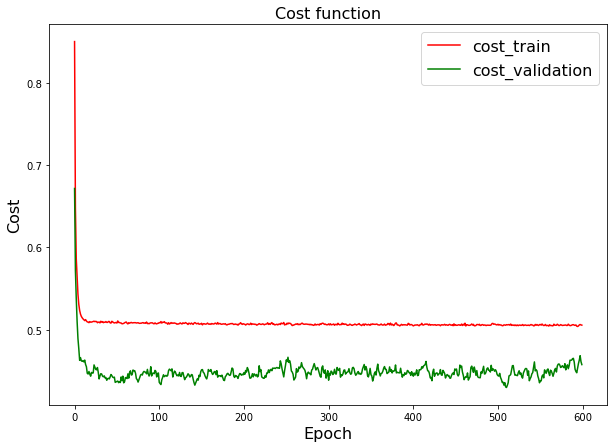

In [28]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'], loc='upper right', prop={'size': 16})
plt.show()


<font size=5 color='blue'>

Underfitting

<font size = 5 color = 'blue'>
    
Evaluation of the Smart Machine. 
    
This is done using the test samples.

In [29]:
preds = model.evaluate(x=test_x, y=test_y)

print ("Loss = " + str(preds))

2/2 [==============================] - 0s 2ms/step - loss: 0.5039
Loss = 0.5039479732513428


<font size=5 color='blue'>
    
## <center> A new Learning Machine</center> 

<font size=5 color='blue'>

Model of the Machine: The output $Y$ does not depend linearly with the features. 
This fact is modeled with a sigmoid type function; for example, a hyperbolic tangent

<font size=4 color='black'>

The features that determine the phenomen are described by the vector  $X = (x_1, x_2, x_3, ...x_k,...x_K)$
    
The our model assumes that the output Y varies lienarly with each feature
    $$ z = \sum_{k=1}^K w_k*x_k + b$$
    $$ F(X) = tanh(z)= \frac{{e}^{2z} - 1}{{e}^{2z} + 1}$$

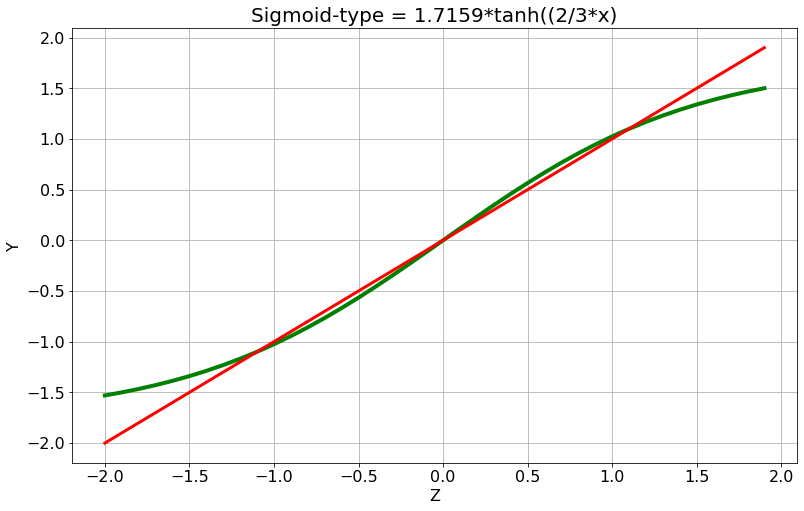

In [30]:
def tanh(z):
    return (np.exp(2*z)- 1)/(np.exp(2*z)+1)

# The following array is generated for plotting the hyperbolic tangent function
x1 = np.arange(-2, 2.0, 0.1)
y1 = 1.759*tanh((2/3*x1))

y2 = x1
#Samples and function F are plotted
plt.figure(figsize=(13,8))

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.xlabel('Z', fontsize=16)
plt.grid(True)
plt.title('Sigmoid-type = 1.7159*tanh((2/3*x)', size=20)

#Plotting function
plt.plot(x1, y1, color='green', lw=4)
plt.plot(x1, y2, color='red', lw=3)

plt.show()

It has 2 layers,
with the following number of nodes per layer [10, 1]


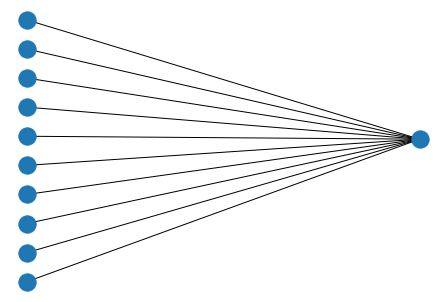

In [31]:
n_x = learn_x.shape[1] 
n_y = learn_y.shape[1]
    
layers = [n_x, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [32]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
output_nodes = n_y    # The output layer has n_y nodes

model = Sequential()

model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))


<font size=5 color='blue'>
Architecture Summary and Chart

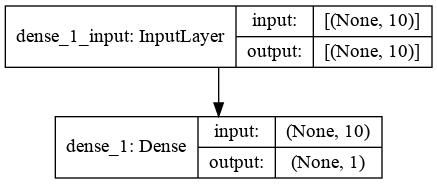

In [33]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

In [35]:
sgd = optimizers.SGD(lr=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)


<font size=5 color='blue'>
    
The Machine is learning

In [36]:
# 10 % of the learning data will be used to validate the training
validation_fraction = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_fraction, verbose=2)

# the "history" object contains information generated during learning

Epoch 1/600
12/12 - 0s - loss: 0.8489 - val_loss: 0.7028
Epoch 2/600
12/12 - 0s - loss: 0.6647 - val_loss: 0.6185
Epoch 3/600
12/12 - 0s - loss: 0.6141 - val_loss: 0.5805
Epoch 4/600
12/12 - 0s - loss: 0.5861 - val_loss: 0.5564
Epoch 5/600
12/12 - 0s - loss: 0.5713 - val_loss: 0.5444
Epoch 6/600
12/12 - 0s - loss: 0.5610 - val_loss: 0.5351
Epoch 7/600
12/12 - 0s - loss: 0.5550 - val_loss: 0.5293
Epoch 8/600
12/12 - 0s - loss: 0.5487 - val_loss: 0.5241
Epoch 9/600
12/12 - 0s - loss: 0.5431 - val_loss: 0.5215
Epoch 10/600
12/12 - 0s - loss: 0.5402 - val_loss: 0.5131
Epoch 11/600
12/12 - 0s - loss: 0.5374 - val_loss: 0.5134
Epoch 12/600
12/12 - 0s - loss: 0.5359 - val_loss: 0.5116
Epoch 13/600
12/12 - 0s - loss: 0.5340 - val_loss: 0.5075
Epoch 14/600
12/12 - 0s - loss: 0.5333 - val_loss: 0.5078
Epoch 15/600
12/12 - 0s - loss: 0.5321 - val_loss: 0.5058
Epoch 16/600
12/12 - 0s - loss: 0.5311 - val_loss: 0.5080
Epoch 17/600
12/12 - 0s - loss: 0.5307 - val_loss: 0.5054
Epoch 18/600
12/12 - 0s

Epoch 142/600
12/12 - 0s - loss: 0.5242 - val_loss: 0.4955
Epoch 143/600
12/12 - 0s - loss: 0.5250 - val_loss: 0.4925
Epoch 144/600
12/12 - 0s - loss: 0.5247 - val_loss: 0.4926
Epoch 145/600
12/12 - 0s - loss: 0.5243 - val_loss: 0.4921
Epoch 146/600
12/12 - 0s - loss: 0.5242 - val_loss: 0.4920
Epoch 147/600
12/12 - 0s - loss: 0.5245 - val_loss: 0.4919
Epoch 148/600
12/12 - 0s - loss: 0.5247 - val_loss: 0.4926
Epoch 149/600
12/12 - 0s - loss: 0.5244 - val_loss: 0.4905
Epoch 150/600
12/12 - 0s - loss: 0.5247 - val_loss: 0.4912
Epoch 151/600
12/12 - 0s - loss: 0.5245 - val_loss: 0.4934
Epoch 152/600
12/12 - 0s - loss: 0.5244 - val_loss: 0.4947
Epoch 153/600
12/12 - 0s - loss: 0.5241 - val_loss: 0.4926
Epoch 154/600
12/12 - 0s - loss: 0.5246 - val_loss: 0.4961
Epoch 155/600
12/12 - 0s - loss: 0.5244 - val_loss: 0.4946
Epoch 156/600
12/12 - 0s - loss: 0.5240 - val_loss: 0.4944
Epoch 157/600
12/12 - 0s - loss: 0.5240 - val_loss: 0.4949
Epoch 158/600
12/12 - 0s - loss: 0.5241 - val_loss: 0.48

Epoch 281/600
12/12 - 0s - loss: 0.5243 - val_loss: 0.4952
Epoch 282/600
12/12 - 0s - loss: 0.5243 - val_loss: 0.4935
Epoch 283/600
12/12 - 0s - loss: 0.5242 - val_loss: 0.4917
Epoch 284/600
12/12 - 0s - loss: 0.5243 - val_loss: 0.4925
Epoch 285/600
12/12 - 0s - loss: 0.5238 - val_loss: 0.4920
Epoch 286/600
12/12 - 0s - loss: 0.5240 - val_loss: 0.4902
Epoch 287/600
12/12 - 0s - loss: 0.5237 - val_loss: 0.4914
Epoch 288/600
12/12 - 0s - loss: 0.5238 - val_loss: 0.4913
Epoch 289/600
12/12 - 0s - loss: 0.5247 - val_loss: 0.4919
Epoch 290/600
12/12 - 0s - loss: 0.5244 - val_loss: 0.4923
Epoch 291/600
12/12 - 0s - loss: 0.5239 - val_loss: 0.4941
Epoch 292/600
12/12 - 0s - loss: 0.5238 - val_loss: 0.4933
Epoch 293/600
12/12 - 0s - loss: 0.5237 - val_loss: 0.4933
Epoch 294/600
12/12 - 0s - loss: 0.5241 - val_loss: 0.4930
Epoch 295/600
12/12 - 0s - loss: 0.5242 - val_loss: 0.4903
Epoch 296/600
12/12 - 0s - loss: 0.5245 - val_loss: 0.4942
Epoch 297/600
12/12 - 0s - loss: 0.5239 - val_loss: 0.49

Epoch 420/600
12/12 - 0s - loss: 0.5238 - val_loss: 0.4918
Epoch 421/600
12/12 - 0s - loss: 0.5238 - val_loss: 0.4908
Epoch 422/600
12/12 - 0s - loss: 0.5236 - val_loss: 0.4953
Epoch 423/600
12/12 - 0s - loss: 0.5237 - val_loss: 0.4931
Epoch 424/600
12/12 - 0s - loss: 0.5236 - val_loss: 0.4941
Epoch 425/600
12/12 - 0s - loss: 0.5235 - val_loss: 0.4962
Epoch 426/600
12/12 - 0s - loss: 0.5236 - val_loss: 0.4973
Epoch 427/600
12/12 - 0s - loss: 0.5235 - val_loss: 0.4963
Epoch 428/600
12/12 - 0s - loss: 0.5236 - val_loss: 0.4967
Epoch 429/600
12/12 - 0s - loss: 0.5238 - val_loss: 0.4963
Epoch 430/600
12/12 - 0s - loss: 0.5236 - val_loss: 0.4959
Epoch 431/600
12/12 - 0s - loss: 0.5234 - val_loss: 0.4948
Epoch 432/600
12/12 - 0s - loss: 0.5235 - val_loss: 0.4966
Epoch 433/600
12/12 - 0s - loss: 0.5233 - val_loss: 0.4962
Epoch 434/600
12/12 - 0s - loss: 0.5232 - val_loss: 0.4985
Epoch 435/600
12/12 - 0s - loss: 0.5237 - val_loss: 0.4981
Epoch 436/600
12/12 - 0s - loss: 0.5236 - val_loss: 0.49

Epoch 559/600
12/12 - 0s - loss: 0.5233 - val_loss: 0.4946
Epoch 560/600
12/12 - 0s - loss: 0.5229 - val_loss: 0.4953
Epoch 561/600
12/12 - 0s - loss: 0.5233 - val_loss: 0.4943
Epoch 562/600
12/12 - 0s - loss: 0.5231 - val_loss: 0.4950
Epoch 563/600
12/12 - 0s - loss: 0.5229 - val_loss: 0.4945
Epoch 564/600
12/12 - 0s - loss: 0.5229 - val_loss: 0.4947
Epoch 565/600
12/12 - 0s - loss: 0.5231 - val_loss: 0.4940
Epoch 566/600
12/12 - 0s - loss: 0.5233 - val_loss: 0.4950
Epoch 567/600
12/12 - 0s - loss: 0.5226 - val_loss: 0.4942
Epoch 568/600
12/12 - 0s - loss: 0.5228 - val_loss: 0.4952
Epoch 569/600
12/12 - 0s - loss: 0.5230 - val_loss: 0.4951
Epoch 570/600
12/12 - 0s - loss: 0.5228 - val_loss: 0.4948
Epoch 571/600
12/12 - 0s - loss: 0.5227 - val_loss: 0.4971
Epoch 572/600
12/12 - 0s - loss: 0.5229 - val_loss: 0.4953
Epoch 573/600
12/12 - 0s - loss: 0.5228 - val_loss: 0.4967
Epoch 574/600
12/12 - 0s - loss: 0.5230 - val_loss: 0.4960
Epoch 575/600
12/12 - 0s - loss: 0.5231 - val_loss: 0.49

<font size=5 color='blue'>

Plots of cost function versus epoch    

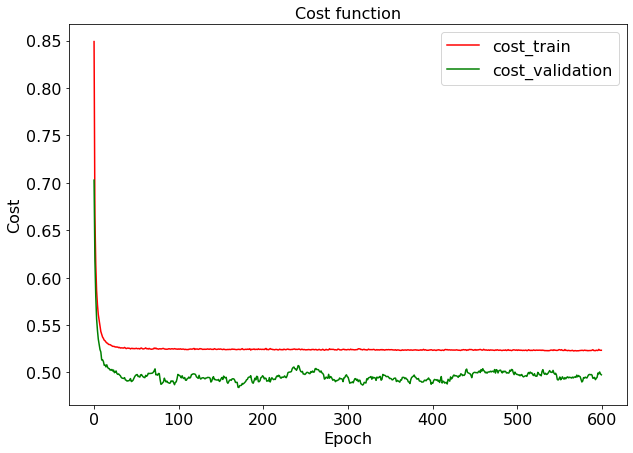

In [37]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()


<font size=5 color='blue'>

Uderfitting

<font size=5 color='blue'>
    
## <center> Learning Machines constructed with Artificial Neural Networks (ANN)</center> 

<font size=5 color='black'>
<center> SEM images of a neuron and a network of neurons. Neuron model and mathematical model of a neuron </center>    


<table>
  <tr>
    <td>Neuron</td>
     <td>Network of neurons</td>
      <td>Neuron model</td>
      <td>Mathematical model of a neuron</td>
         
  </tr>
  <tr>
    <td><img src="neuron_SEM.jpg" width=290 height=480></td>
    <td><img src="human-neuron.png" width=270 height=480></td>
    <td><img src="Neuron_labelled.png" width=200 height=380></td>
    <td><img src="neuron-mat-model.png" width=370 height=380></td>
  </tr>
 </table>

<font size=5 color='black'>
<center> Approximation by Superpositions of a Sigmoidal Function </center>    

<font size=4 color='black'>
    
[Reference](./Literatura/Approx-superpositions-sigmoids_1989.pdf)
$$ $$    
$\bf Abstract$-In this paper we demonstrate that finite linear combinations of com-
positions of a fixed, univariate function and a set ofaffine functionals can uniformly
approximate any continuous function of n real variables with support in the unit
hypercube; only mild conditions are imposed on the univariate function. Our
results settle an open question about representability in the class of single bidden
layer neural networks. In particular, we show that arbitrary decision regions can
be arbitrarily well approximated by continuous feedforward neural networks with
only a single internal, hidden layer and any continuous sigmoidal nonlinearity. The
paper discusses approximation properties of other possible types of nonlinearities
that might be implemented by artificial neural networks.
    


<font size=5 color='black'>
<center> Approximation Capabilities of Multilayer Feedforward Networks </center>    

<font size=4 color='black'>
$\bf Abstract$--We show that standard multilayer feedfbrward networks with as few as a single hidden layer and
arbitrary bounded and nonconstant activation function are universal approximators with respect to LP(lt) per-
formance criteria, for arbitrary finite input environment measures p, provided only that sufficiently many hidden
units are available. If the activation function is continuous, bounded and nonconstant, then continuous mappings
can be learned uniformly over compact input sets. We also give very general conditions ensuring that networks
with sufficiently smooth activation functions are capable of arbitrarily accurate approximation to a_Function and
its derivatives.
    
[Reference](./Literatura/FF-NN-universal-Approximator_1991.pdf)

<font size=5 color='blue'>
    
## <center>  A new Learning Machine</center> 

<font size=5 color='blue'>
    
Model of the Machine: Full-Connected Feed-Forward Network (FF) with one hidden layer with two neurons. The activation function of the last neuron is linear


It has 3 layers,
with the following number of nodes per layer [10, 2, 1]


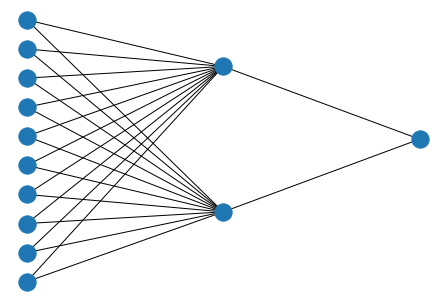

In [38]:
n_x = learn_x.shape[1] 
n_h = 2
n_y = learn_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [39]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h   # The first hidden layer has n_h nodes
output_nodes = n_y    # The output layer has n_y nodes

model = Sequential()

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))


<font size=5 color='blue'>
Architecture Summary and Chart

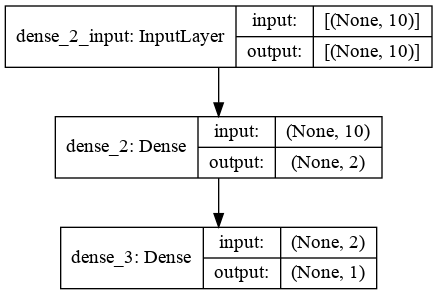

In [40]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

In [42]:
sgd = optimizers.SGD(lr=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
The Machine is learning

In [43]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio, verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

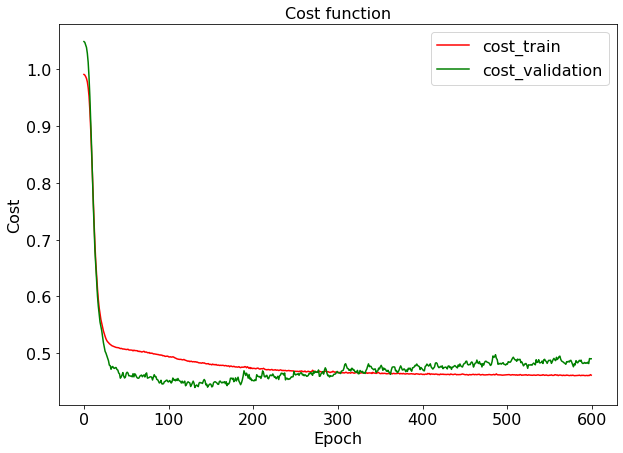

In [44]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()


<font size=5 color='blue'>

A good model

<font size=5 color='blue'>
    
## <center>  A new Learning Machine</center> 

<font size=5 color='blue'>
    
Model of the Machine: Full-Connected Feed-Forward Network (FF) with one hidden layer with two neurons. The activation function of the last neuron is a sigmoid function.


It has 3 layers,
with the following number of nodes per layer [10, 2, 1]


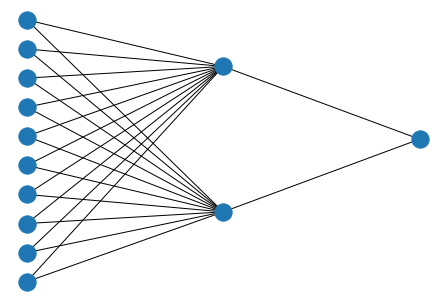

In [45]:
n_x = learn_x.shape[1] 
n_h = 2
n_y = learn_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [46]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h   # The first hidden layer has n_h nodes
output_nodes = n_y    # The output layer has n_y nodes

model = Sequential()

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='tanh'))

<font size=5 color='blue'>
Architecture Summary and Chart

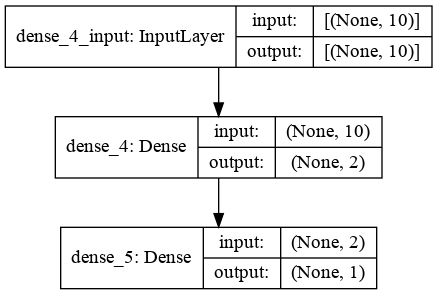

In [47]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition

In [49]:
sgd = optimizers.SGD(lr=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
The Machine is Learning

In [50]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio, verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

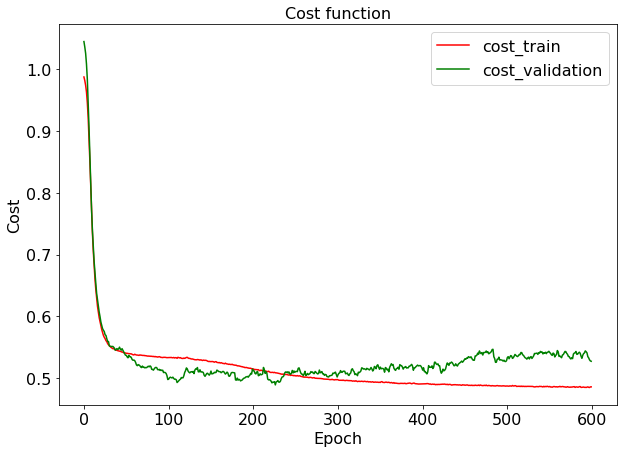

In [51]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()


<font size=5 color='blue'>

Overfitting

<font size=5 color='blue'>
    
## <center> A new Learning Machine</center> 

<font size=5 color='blue'>
    
Model of the Machine: Full-Connected Feed-Forward Network (FF) with one hidden layer with three neurons. The activation function of the last neuron is linear.


It has 3 layers,
with the following number of nodes per layer [10, 3, 1]


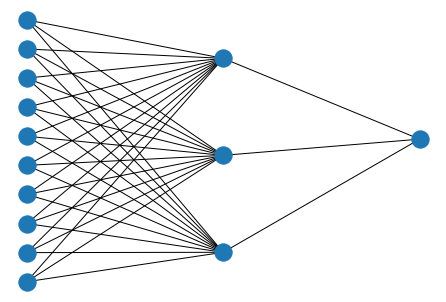

In [52]:
n_x = learn_x.shape[1] 
n_h = 3
n_y = learn_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [53]:
np.random.seed(1)

model = Sequential()

input_nodes = n_x     #input layer has n_x nodes
hlayer1_nodes = n_h   #first hidden layer has n_h nodes
output_nodes = n_y    #output layer has n_y nodes

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

<font size=5 color='blue'>
Architecture Summary and Chart

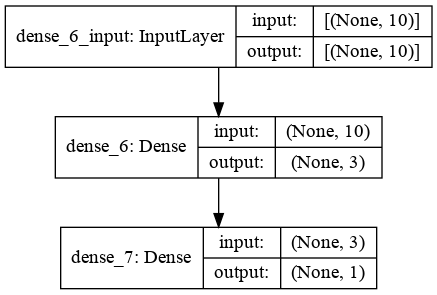

In [54]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition.

In [56]:
sgd = optimizers.SGD(lr=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
The Machine is learning

In [57]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio, verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

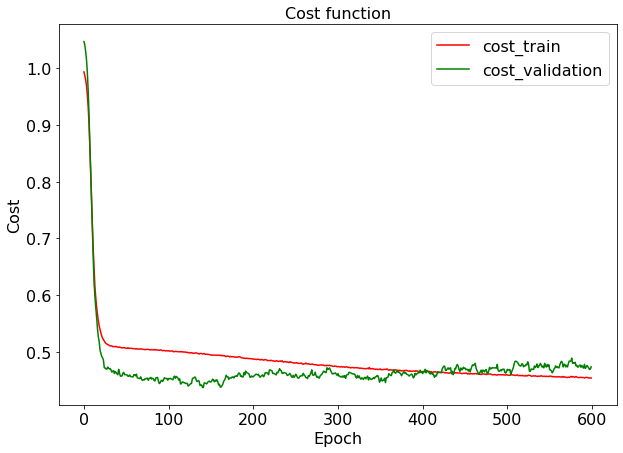

In [58]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()


<font size=5 color='blue'>

Overfitting

<font size=5 color='blue'>
    
## <center> A new Learning Machine</center> 

<font size=5 color='blue'>
    
Model of the Machine: Full-Connected Feed-Forward Network (FF) with one hidden layer with four neurons. The activation function of the last neuron is linear.


It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


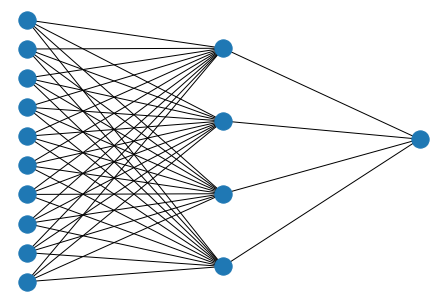

In [59]:
n_x = learn_x.shape[1] 
n_h = 4
n_y = learn_y.shape[1]
    
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [60]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h   # The first hidden layer has n_h nodes
output_nodes = n_y    # The output layer has n_y nodes


model = Sequential()

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

<font size=5 color='blue'>
Architecture Summary and Chart

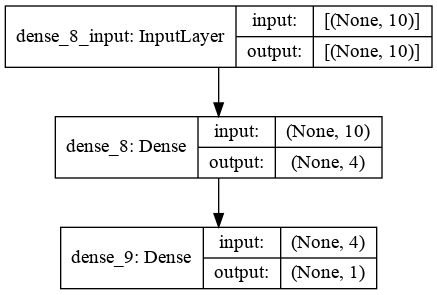

In [61]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition.

In [63]:
sgd = optimizers.SGD(lr=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
The Machine is Learning

In [64]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio,verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

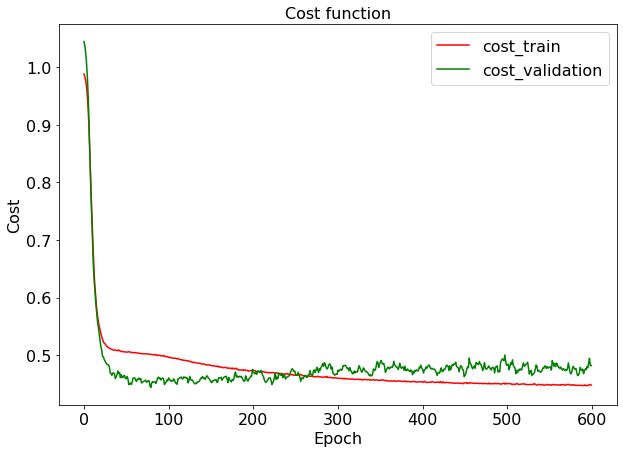

In [65]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()


<font size=5 color='blue'>

Overfitting   

<font size=5 color='blue'>
    
## <center> A new Learning Machine</center> 

<font size=5 color='blue'>
    
Model of the Machine: A Full-Connected Feed-Forward Network (FF) with two hidden layers: the first of which has 5 neurons and the second is one that has 4 neurons. The activation function of the last neuron is linear.


It has 4 layers,
with the following number of nodes per layer [10, 5, 4, 1]


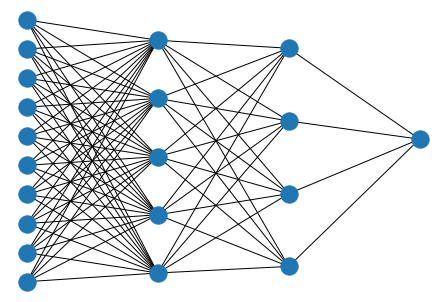

In [66]:
n_x = learn_x.shape[1] 
n_h1 = 5
n_h2  = 4
n_y = learn_y.shape[1]
    
layers = [n_x, n_h1, n_h2, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
Model architecture 


In [67]:
np.random.seed(1)

input_nodes = n_x     # The input layer has n_x nodes
hlayer1_nodes = n_h1  # The first hidden layer has n_h1 nodes
hlayer2_nodes = n_h2  # The second hidden layes has n_h2 nodes
output_nodes = n_y    # The output layer has n_y nodes


model = Sequential()

model.add(Dense(hlayer1_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))

model.add(Dense(hlayer2_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='tanh'))


model.add(Dense(output_nodes, kernel_initializer='uniform', bias_initializer='zeros', activation='linear'))

<font size=5 color='blue'>
Architecture Summary and Chart

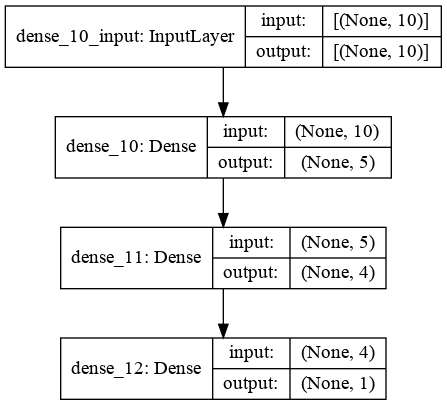

In [68]:
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

In [69]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


<font size=5  color='blue'>
    
Compiling the model. Includes the optimizer definition.

In [70]:
sgd = optimizers.SGD(lr=0.01)

model.compile(loss='mean_squared_error', optimizer=sgd)

<font size=5 color='blue'>
    
The Machine is learning

In [71]:
validation_ratio = 0.1
epochs = 600

history = model.fit(learn_x, learn_y, epochs=epochs, validation_split = validation_ratio,verbose=0)

<font size=5 color='blue'>

Plots of cost function versus epoch    

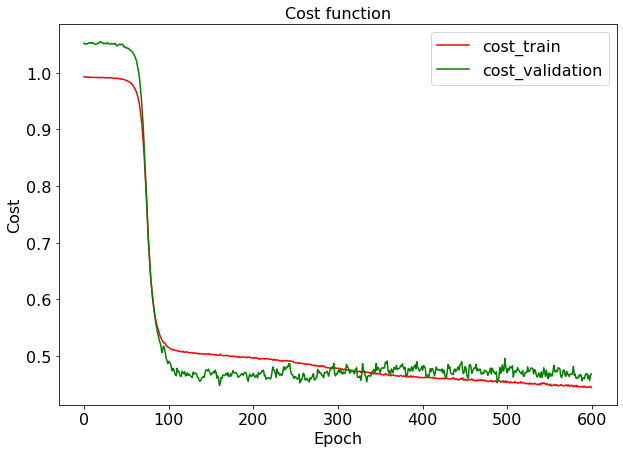

In [72]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['cost_train', 'cost_validation'],loc='upper right', prop={'size': 16})
plt.show()


<font size=5 color='blue'>

Overfitting    